### SQL Employee Database Analysis
     Import data from PostgreSQL,  Database: SQL_Employee_db
     
     1. Create a Histogram for Salaries
     2. Create a Bar Chart of Average Salary By Title

In [1]:
# Imports 

from sqlalchemy import create_engine
import pandas as pd
import os
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


In [2]:
# Set variables to populate the database connection string

db_user = 'postgres'
db_password = 'gracem10'
db_host = 'localhost'
db_port = 5432

# DataBase Name
db_name = "SQL_Employee_db"

engine = create_engine(f"postgres://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")


In [3]:
connection = engine.connect()

In [4]:
# Query database to find Salary history information

salary_data = pd.read_sql("SELECT * FROM salaries", engine)

In [5]:
# Review salary information

salary_data.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


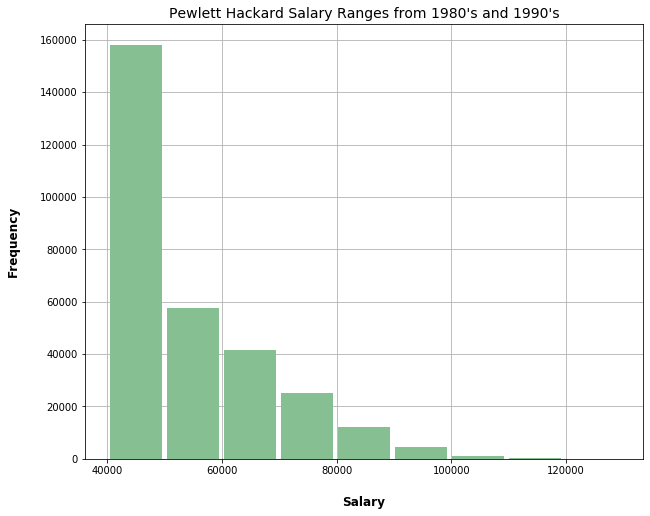

In [40]:
#Create a Histogram for Salary Ranges
# determine bins

min = salary_data["salary"].min()
max = salary_data["salary"].max()
binx = (round((max-min)/10000)).astype(int)

ax = salary_data.hist(column='salary', bins=binx, grid=True, figsize=(10,8), zorder=2, color='#86bf91', rwidth=0.9)

ax = ax[0]
for x in ax:

    # Set title
    x.set_title("Pewlett Hackard Salary Ranges from 1980's and 1990's", size=14)

    # Set x-axis label
    x.set_xlabel("Salary", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)



In [41]:
# Query database to find Salary and Department history information

dept_salary = pd.read_sql("SELECT d.dept_name, s.salary FROM salaries s INNER JOIN dept_emp de ON de.emp_no = s.emp_no INNER JOIN departments d ON d.dept_no = de.dept_no", engine)

In [42]:
# Review salary and department information 

dept_salary.head()

,dept_name,salary
0,Production,40006
1,Production,41538
2,Customer Service,40000
3,Finance,81662
4,Production,40919


In [43]:
# Calculate average salaries for charting

avg_group = dept_salary.groupby(["dept_name"]).mean()
average = avg_group.reset_index()

In [44]:
average.head(20)

,dept_name,salary
0,Customer Service,47998.670441
1,Development,48697.334663
2,Finance,59533.516546
3,Human Resources,44678.646801
4,Marketing,61095.897383
5,Production,48760.450827
6,Quality Management,46456.005717
7,Research,48850.189719
8,Sales,69832.127151


In [45]:
##Create a Bar Chart to display Average Salary by Departments

data = average["salary"]
labels = average["dept_name"]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

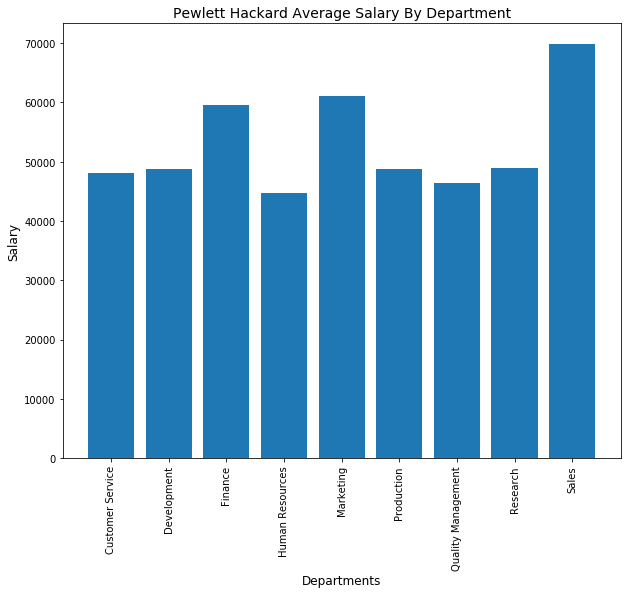

In [47]:

plt.figure(figsize=(10,8))
plt.xticks(range(len(data)), labels)
plt.xlabel('Departments', size=12)
plt.ylabel('Salary', size=12)
plt.title('Pewlett Hackard Average Salary By Department', size=14)
plt.bar(range(len(data)), data) 
plt.xticks(rotation='vertical')
